In [14]:
# importing the necessary libraries
#for mathematical computationimport numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import plotly 
#import plotly.express as px
#% matplotlib inline

df = pd.read_csv('songs_normalize.csv')

In [15]:
print(df.head(5))

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [16]:
#data info
df.info()#Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [22]:
#artists sorted from most to least popular (popularity in relation to artist)
df_popularArtists = df.groupby('artist').sum().sort_values('popularity', ascending=False)
df_popularArtists = df_numbercharted.reset_index()
df_popularArtists

,index,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Rihanna,5887298,8,50247,1803,16.482,16.844,123,-137.276,14,1.9983,3.811065,0.153460,3.7089,13.0940,3128.082
1,1,Eminem,5939050,20,42123,1519,15.603,16.374,113,-83.568,9,4.6724,2.212270,0.001437,4.0052,11.4526,2360.762
2,2,Drake,5337202,18,46334,1424,16.859,13.767,120,-164.954,15,3.7478,1.995427,0.100460,3.8368,10.3514,2812.323
3,3,Calvin Harris,4546171,1,40269,1356,13.719,17.429,118,-77.276,6,1.1381,1.559682,1.041232,4.3994,12.3440,2502.882
4,4,Britney Spears,4149701,1,38095,1198,13.457,14.198,113,-104.603,9,1.3786,4.452690,0.028039,2.8750,12.9200,2162.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,830,Silentó,185131,0,2015,0,0.819,0.768,8,-8.522,1,0.1340,0.234000,0.000000,0.3340,0.9640,139.982
831,831,Storm Queen,150400,0,2014,0,0.832,0.815,0,-8.035,0,0.0810,0.003040,0.005530,0.2630,0.5190,119.995
832,832,AJR,201160,0,2017,0,0.673,0.637,5,-4.518,1,0.0429,0.137000,0.000000,0.1840,0.6780,123.980
833,833,The Lumineers,160097,0,2016,0,0.664,0.576,5,-6.429,1,0.0286,0.630000,0.000198,0.0902,0.6210,76.026


Text(0, 0.5, 'Popularity of the Song')

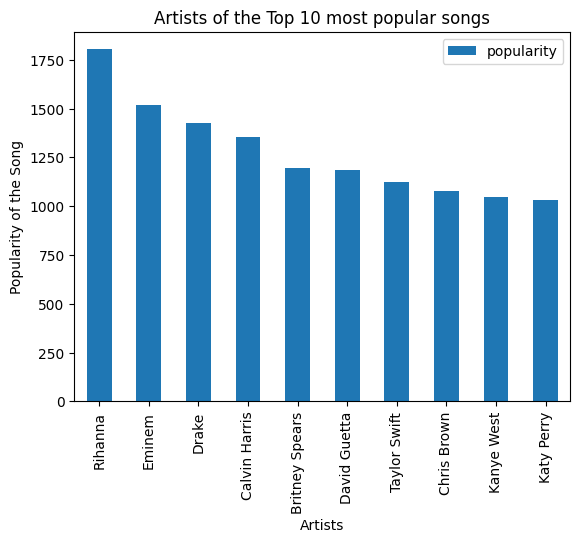

In [26]:
# visualize top 10 popularArtists
topPopularArtists = df_popularArtists.head(10)
topPopularArtists.plot(x='artist', y='popularity', kind = 'bar')

plt.title('Artists of the Top 10 most popular songs')
plt.xlabel('Artists')
plt.ylabel('Popularity of the Song')


#klären in was für einer "Einheit" Popularity ist!!!!!

Text(0, 0.5, 'Popularity')

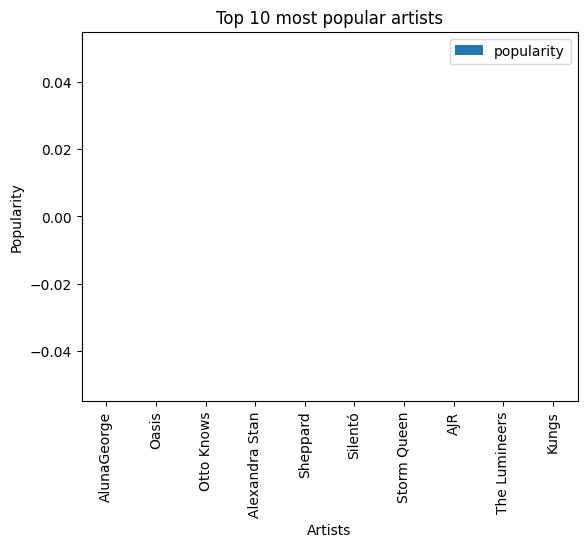

In [25]:
# visualize top 10 popularArtists
leastPopularArtists = df_popularArtists.tail(10)
leastPopularArtists.plot(x='artist', y='popularity', kind = 'bar')

plt.title('Top 10 most popular artists')
plt.xlabel('Artists')
plt.ylabel('Popularity')


#bisschen unnötig, man sieht ja sowieso nichts